In [33]:

import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

In [98]:
import nltk
#nltk.download()
from nltk.corpus import wordnet
from nltk.corpus import wordnet
import collections
import requests
from bs4 import BeautifulSoup
#from requests_html import HTMLSession
from PyDictionary import PyDictionary
import pandas as pd
from itertools import chain
import numpy as np
import re
import string
from collections import Counter
from os import path
from PIL import Image
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from contextlib import suppress
import nltk
from nltk.corpus import stopwords
sw = stopwords.words("english")
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

In [34]:
options = webdriver.ChromeOptions()
options.add_argument('--ignore-certificate-errors')
options.add_argument('--incognito')
options.add_argument('--headless')
driver = webdriver.Chrome("chromedriver", chrome_options=options)

C:\Users\Zi Ye\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: use options instead of chrome_options
  """


In [39]:
#url of the page we want to scrape
url = 'https://scholar.google.com/scholar?hl=en&as_sdt=0%2C24&q=machine+learning+medical+diagnosis&btnG='
# initiating the webdriver. Parameter includes the path of the webdriver.

driver.get(url) 
  
# this is just to ensure that the page is loaded
time.sleep(5) 
  
html = driver.page_source
  
# this renders the JS code and stores all
# of the information in static HTML code.
  
# Now, we could simply apply bs4 to html variable
soup = BeautifulSoup(html, "html.parser")

In [53]:
print(soup.prettify())

<html class="gs_el_ta gs_el_sm">
 <head>
  <title>
   machine learning medical diagnosis - Google Scholar
  </title>
  <meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="origin-when-cross-origin" name="referrer"/>
  <meta content="width=device-width,initial-scale=1,minimum-scale=1,maximum-scale=2" name="viewport"/>
  <meta content="telephone=no" name="format-detection"/>
  <link href="/favicon.ico" rel="shortcut icon"/>
  <style>
   html,body,form,table,div,h1,h2,h3,h4,h5,h6,img,ol,ul,li,button{margin:0;padding:0;border:0;}table{border-collapse:collapse;border-width:0;empty-cells:show;}html,body{height:100%}#gs_top{position:relative;box-sizing:border-box;min-height:100%;min-width:964px;-webkit-tap-highlight-color:rgba(0,0,0,0);}#gs_top>*:not(#x){-webkit-tap-highlight-color:rgba(204,204,204,.5);}.gs_el_ph #gs_top,.gs_el_ta #gs_top{min-width:320px;}#gs_top.gs_nscl{position:fixed;width:100%;}body,td

In [ ]:
paper.find('a').text.strip()

In [89]:
import re
titleS=[]
AuthorInfoS=[]
Abstracts=[]
for paper in papers:
    title=paper.find('a').text.strip()
    titleS.append(title)
    print(title)
    AuthorInfo = paper.find('div',class_="gs_a").text.strip()
    Date=re.findall(", (\d{4})", AuthorInfo)[0]
    if AuthorInfo:
        #AuthorInfo=AuthorInfo.text.strip()
        AuthorInfoS.append(AuthorInfo)
    else:
        AuthorInfoS.append(np.nan)
    print(AuthorInfo)
    print(Date)
    Abstract = paper.find('div',class_="gs_rs").text.strip()
    print(Abstract)
    Abstracts.append(Abstract)
    #Abstract = paper.find('p',class_="item-strip-abstract").text.strip()

Machine learning for medical diagnosis: history, state of the art and perspective
I Kononenko - Artificial Intelligence in medicine, 2001 - Elsevier
2001
The paper provides an overview of the development of intelligent data analysis in medicine from a machine learning perspective: a historical view, a state-of-the-art view, and a view on some future trends in this subfield of applied artificial intelligence. The paper is not intended …
Machine learning, medical diagnosis, and biomedical engineering research-commentary
KR Foster, R Koprowski, JD Skufca - Biomedical engineering online, 2014 - Springer
2014
A large number of papers are appearing in the biomedical engineering literature that describe the use of machine learning techniques to develop classifiers for detection or diagnosis of disease. However, the usefulness of this approach in developing clinically …
Application of machine learning to medical diagnosis
I Kononenko, I Bratko, M Kukar - Machine Learning and Data Mining …, 199

In [157]:
def Scraped_data(subject,pg):
    #url='https://scholar.google.com/scholar?hl=en&as_sdt='+pg+'%2C24&q='+subject+'&btnG='
    #url='https://scholar.google.com/scholar?hl=en&as_sdt='+pg+'%2C24&q='+subject+'&oq='
    #url='https://scholar.google.com/scholar?start='+pg+'&q=machine+learning+medical+diagnosis&hl=en&as_sdt=8,24'
    url='https://scholar.google.com/scholar?start=60&q=machine+learning+medical+diagnosis'
    #str2=subject
    #url=str1+str2
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    ppapers = soup.find_all('div', class_="gs_ri")
    Titles=[]
    Dates=[]
    Abstracts=[]
    for paper in papers:
        # Each job_elem is a new BeautifulSoup object.
        # You can use the same methods on it as you did before.
        Title = paper.find('a').text.strip()
        Titles.append(Title)
        AuthorInfo = paper.find('div',class_="gs_a").text.strip()
        Date = Date=re.findall(", (\d{4})", AuthorInfo)[0]
        
        if Date:
            #Date=Date.text.strip()
            Dates.append(Date)
        else:
            Dates.append(np.nan)
        Abstract = paper.find('div',class_="gs_rs").text.strip()
        if Abstract:
            #Abstract = paper.find('p',class_="item-strip-abstract").text.strip()
            Abstracts.append(Abstract)
        else:
            Abstracts.append(np.nan)
    d = {'Titles':Titles, 'Dates': Dates,'Abstracts':Abstracts}
    df = pd.DataFrame(data=d)
    return df

In [158]:
df1=Scraped_data('machine+learning+medical+diagnosis','0')
df1

,Titles,Dates,Abstracts
0,Machine learning for medical diagnosis: histor...,2001,The paper provides an overview of the developm...
1,"Machine learning, medical diagnosis, and biome...",2014,A large number of papers are appearing in the ...
2,Application of machine learning to medical dia...,1997,Although machine learning may induce reliable ...
3,Classifier ensemble construction with rotation...,2011,Improving accuracies of machine learning algor...
4,Machine learning for medical imaging,2017,"… algorithms, but market analysis results indi..."
5,Your evidence? Machine learning algorithms for...,2020,Computer systems for medical diagnosis based o...
6,Machine learning techniques for medical diagno...,2018,Abstract Background and Objective Complementar...
7,Improving the accuracy of medical diagnosis wi...,2020,Abstract Machine learning promises to revoluti...
8,A survey on medical diagnosis of diabetes usin...,2019,"While designing medical diagnosis software, di..."
9,Neural networks in medical diagnosis: Comparis...,1996,… medical Y 1. Introduction Medical decision-m...


In [159]:
df2=Scraped_data('machine+learning+medical+diagnosis','70')
df2

,Titles,Dates,Abstracts
0,Machine learning for medical diagnosis: histor...,2001,The paper provides an overview of the developm...
1,"Machine learning, medical diagnosis, and biome...",2014,A large number of papers are appearing in the ...
2,Application of machine learning to medical dia...,1997,Although machine learning may induce reliable ...
3,Classifier ensemble construction with rotation...,2011,Improving accuracies of machine learning algor...
4,Machine learning for medical imaging,2017,"… algorithms, but market analysis results indi..."
5,Your evidence? Machine learning algorithms for...,2020,Computer systems for medical diagnosis based o...
6,Machine learning techniques for medical diagno...,2018,Abstract Background and Objective Complementar...
7,Improving the accuracy of medical diagnosis wi...,2020,Abstract Machine learning promises to revoluti...
8,A survey on medical diagnosis of diabetes usin...,2019,"While designing medical diagnosis software, di..."
9,Neural networks in medical diagnosis: Comparis...,1996,… medical Y 1. Introduction Medical decision-m...


In [109]:
df2.columns

Index(['Titles', 'Dates', 'Abstracts'], dtype='object')

In [107]:
pd.concat([df1,df2])

,Titles,Dates,Abstracts
0,Machine learning for medical diagnosis: histor...,2001,The paper provides an overview of the developm...
1,"Machine learning, medical diagnosis, and biome...",2014,A large number of papers are appearing in the ...
2,Application of machine learning to medical dia...,1997,Although machine learning may induce reliable ...
3,Classifier ensemble construction with rotation...,2011,Improving accuracies of machine learning algor...
4,Machine learning for medical imaging,2017,"… algorithms, but market analysis results indi..."
5,Your evidence? Machine learning algorithms for...,2020,Computer systems for medical diagnosis based o...
6,Machine learning techniques for medical diagno...,2018,Abstract Background and Objective Complementar...
7,Improving the accuracy of medical diagnosis wi...,2020,Abstract Machine learning promises to revoluti...
8,A survey on medical diagnosis of diabetes usin...,2019,"While designing medical diagnosis software, di..."
9,Neural networks in medical diagnosis: Comparis...,1996,… medical Y 1. Introduction Medical decision-m...


In [160]:
# Get result from page 0 - 10
#pgs=['0','10','20','30','40','50','60','70','80','90']
subjects=['machine+learning+medical+diagnosis','machine+learning+art','machine+learning+computer+vision','machine+learning+graph','machine+learning+speech','machine+learning+time+series','machine+learning+audio','machine+learning+robots','machine+learning+reasoning','machine+learning+adversarial']

In [161]:
df=Scraped_data('machine+learning+medical+diagnosis','0')

In [192]:
def find_bigrams(words,th):
  
    bigram_measures = nltk.collocations.BigramAssocMeasures()
    
    freq_threshold = th
    bigrams = []
    trigram = []

    bigram_finder = BigramCollocationFinder.from_words(words)
    bigram_finder.apply_freq_filter(freq_threshold)
    bigrams.append([x[0] for x in bigram_finder.score_ngrams(bigram_measures.pmi)])
    
    trigram_finder = TrigramCollocationFinder.from_words(words)
    trigram_finder.apply_freq_filter(freq_threshold)
    trigram.append([x[0] for x in trigram_finder.score_ngrams(trigram_measures.pmi)])
    return bigrams,trigram



def remove_bigrams(words,bigrams,trigram):
# newWordslength=len(words)-len(bigrams[0])
    newWords=[]
    for w in range(len(words)-1):
        for i in range(len(bigrams[0])):
            if words[w]==bigrams[0][i][0] and words[w+1]==bigrams[0][i][1]:
                newword=[]
                ww=[words[w],words[w+1]]
                newword= "_".join(ww)
                newWords.append(newword)
            elif w> 1 and words[w-1]==bigrams[0][i][0] and words[w]==bigrams[0][i][1]:
                pass
                #print('bigrams identified:{}'.format(newword))
            else:
                newWords.append(words[w])
    for w in range(len(words)-2):
        for i in range(len(trigram[0])):
            if words[w]==trigram[0][i][0] and words[w+1]==trigram[0][i][1] and words[w+2]==trigram[0][i][2]:
                ww=[words[w],words[w+1],words[w+2]]
                newword= "_".join(ww)
                newWords.append(newword)
            elif w> 1 and words[w-1]==trigram[0][i][0] and words[w]==trigram[0][i][1]:
                pass
                #print('bigrams identified:{}'.format(newword))
            else:
                newWords.append(words[w])
    return newWords
def Combine_synonyms(bigramCorrectlist):
    dict = {}
    allSets = set()
    rep1=[]
    rep2=[]
    
    for wordToCehck in bigramCorrectlist:
        if wordToCehck not in allSets:
            synonyms=[]
            for syn in wordnet.synsets(wordToCehck):
                for l in syn.lemmas():
                    synonyms.append(l.name())
            ss=set(synonyms)            
            allSets.update(ss)
            for syns in ss:
                dict[syns]=wordToCehck
        else:
            repeatword=dict[wordToCehck]
            bigramCorrectlist = [repeatword if i== wordToCehck else i for i in bigramCorrectlist]
            rep1.append(repeatword)
            rep2.append(wordToCehck)
    rep1=set(rep1)
    rep2=set(rep2)

        
    return bigramCorrectlist,rep1,rep2;
bigrams,trigram=find_bigrams(sumsAll,3)
#Get the count table for all subjects
def get_corrected_word_count(subject,sums,sumsAll,bigrams,trigram):
    with suppress('SettingWithCopyWarning'):
        wholeVocabs=[]
        #subject=i
        
        #bigrams,trigram=find_bigrams(sumsAll,3) #find bigrams
        bigramCorrectlist=remove_bigrams(sums[subject],bigrams,trigram) #correct bigrams
        
        SynBigramList,rep1,rep2=Combine_synonyms(bigramCorrectlist) #correct for synonyms

        
        counts = collections.Counter(SynBigramList) # Create counters

        Sdf = pd.DataFrame(list(counts.most_common()),columns = ['word','freq']) #change to dataframe
        Sdf.freq.astype(int)
        Sdf=Sdf.sort_values(by='freq',ascending=False)
        
        SymbigramCorrectlist,rep1,rep2=Combine_synonyms(Sdf) #get rid of synonyms

    return SynBigramList

In [184]:
#replace words
def text_to_words(text,sw):
    translator = re.compile('[%s]' % re.escape(string.punctuation))
    text =translator.sub(' ', text)
    text = text.lower()
    words = word_tokenize(text)
    #words = text.split()
    
    vocab=[]
    for word in words:
        if word.isalpha() and not word in sw:
            vocab.append(word)
    return vocab

In [185]:
sw.append('end')
sw.append('lot')
sw.append('without')
sw.append('due')
sw.append('uses')
sw.append('another')
sw.append('show')
sw.append('used')
sw.append('either')
sw.append('different')
sw.append('often')
sw.append('contain')
sw.append('mix')
sw.append('including')
sw.append('e')
sw.append('g')
sw.append('consist')
sw.append('consists')
sw.append('use')
sw.append('based')
sw.append('many')
sw.append('two')
sw.append('given')
sw.append(['define','more','perspective','paper','overview'])

In [186]:
subjects=['machine+learning+medical+diagnosis','machine+learning+art','machine+learning+computer+vision','machine+learning+graph','machine+learning+speech','machine+learning+time+series','machine+learning+audio','machine+learning+robots','machine+learning+reasoning','machine+learning+adversarial']
sub=[]
wordcloud=list()
for s in subjects:
    As=Scraped_data(s,'0').Abstracts+Scraped_data(s,'0').Titles
    sub.append(s)
    SubWords=list()
    for A in As:
        
        #if A:
        word=text_to_words(A,sw)
        SubWords.append(word)
        #else:
            #SubWords.append('')
        #SubWords = list(chain.from_iterable(SubWords))
    wordcloud.append(SubWords)

In [187]:
df=np.transpose(pd.DataFrame(wordcloud,sub))
df

,machine+learning+medical+diagnosis,machine+learning+art,machine+learning+computer+vision,machine+learning+graph,machine+learning+speech,machine+learning+time+series,machine+learning+audio,machine+learning+robots,machine+learning+reasoning,machine+learning+adversarial
0,"[paper, provides, overview, development, intel...","[paper, provides, overview, development, intel...","[paper, provides, overview, development, intel...","[paper, provides, overview, development, intel...","[paper, provides, overview, development, intel...","[paper, provides, overview, development, intel...","[paper, provides, overview, development, intel...","[paper, provides, overview, development, intel...","[paper, provides, overview, development, intel...","[paper, provides, overview, development, intel..."
1,"[large, number, papers, appearing, biomedical,...","[large, number, papers, appearing, biomedical,...","[large, number, papers, appearing, biomedical,...","[large, number, papers, appearing, biomedical,...","[large, number, papers, appearing, biomedical,...","[large, number, papers, appearing, biomedical,...","[large, number, papers, appearing, biomedical,...","[large, number, papers, appearing, biomedical,...","[large, number, papers, appearing, biomedical,...","[large, number, papers, appearing, biomedical,..."
2,"[although, machine, learning, may, induce, rel...","[although, machine, learning, may, induce, rel...","[although, machine, learning, may, induce, rel...","[although, machine, learning, may, induce, rel...","[although, machine, learning, may, induce, rel...","[although, machine, learning, may, induce, rel...","[although, machine, learning, may, induce, rel...","[although, machine, learning, may, induce, rel...","[although, machine, learning, may, induce, rel...","[although, machine, learning, may, induce, rel..."
3,"[improving, accuracies, machine, learning, alg...","[improving, accuracies, machine, learning, alg...","[improving, accuracies, machine, learning, alg...","[improving, accuracies, machine, learning, alg...","[improving, accuracies, machine, learning, alg...","[improving, accuracies, machine, learning, alg...","[improving, accuracies, machine, learning, alg...","[improving, accuracies, machine, learning, alg...","[improving, accuracies, machine, learning, alg...","[improving, accuracies, machine, learning, alg..."
4,"[algorithms, market, analysis, results, indica...","[algorithms, market, analysis, results, indica...","[algorithms, market, analysis, results, indica...","[algorithms, market, analysis, results, indica...","[algorithms, market, analysis, results, indica...","[algorithms, market, analysis, results, indica...","[algorithms, market, analysis, results, indica...","[algorithms, market, analysis, results, indica...","[algorithms, market, analysis, results, indica...","[algorithms, market, analysis, results, indica..."
5,"[computer, systems, medical, diagnosis, machin...","[computer, systems, medical, diagnosis, machin...","[computer, systems, medical, diagnosis, machin...","[computer, systems, medical, diagnosis, machin...","[computer, systems, medical, diagnosis, machin...","[computer, systems, medical, diagnosis, machin...","[computer, systems, medical, diagnosis, machin...","[computer, systems, medical, diagnosis, machin...","[computer, systems, medical, diagnosis, machin...","[computer, systems, medical, diagnosis, machin..."
6,"[abstract, background, objective, complementar...","[abstract, background, objective, complementar...","[abstract, background, objective, complementar...","[abstract, background, objective, complementar...","[abstract, background, objective, complementar...","[abstract, background, objective, complementar...","[abstract, background, objective, complementar...","[abstract, background, objective, complementar...","[abstract, background, objective, complementar...","[abstract, background, objective, complementar..."
7,"[abstract, machine, learning, promises, revolu...","[abstract, machine, le

In [188]:
#combine the 10 papers vocab for each subject 
sums=[]
for s in range(len(subjects)):
    a=list([j for i in df.iloc[s] for j in i])
    sums.append(a)
    #sum.append([a,subjects[s]])
    
sums=pd.Series(sums,index=subjects)
sums['machine+learning+medical+diagnosis'] 

['paper',
 'provides',
 'overview',
 'development',
 'intelligent',
 'data',
 'analysis',
 'medicine',
 'machine',
 'learning',
 'perspective',
 'historical',
 'view',
 'state',
 'art',
 'view',
 'view',
 'future',
 'trends',
 'subfield',
 'applied',
 'artificial',
 'intelligence',
 'paper',
 'intended',
 'learning',
 'medical',
 'diagnosis',
 'history',
 'state',
 'art',
 'perspective',
 'paper',
 'provides',
 'overview',
 'development',
 'intelligent',
 'data',
 'analysis',
 'medicine',
 'machine',
 'learning',
 'perspective',
 'historical',
 'view',
 'state',
 'art',
 'view',
 'view',
 'future',
 'trends',
 'subfield',
 'applied',
 'artificial',
 'intelligence',
 'paper',
 'intended',
 'learning',
 'medical',
 'diagnosis',
 'history',
 'state',
 'art',
 'perspective',
 'paper',
 'provides',
 'overview',
 'development',
 'intelligent',
 'data',
 'analysis',
 'medicine',
 'machine',
 'learning',
 'perspective',
 'historical',
 'view',
 'state',
 'art',
 'view',
 'view',
 'future',
 't

In [189]:
# whole set
sumsAll=[]
for s in subjects:
    #a=list([j for i in sums.loc[s] for j in i])
    sumsAll+=sums.loc[s]
    #sum.append([a,subjects[s]])
sumsAll

['paper',
 'provides',
 'overview',
 'development',
 'intelligent',
 'data',
 'analysis',
 'medicine',
 'machine',
 'learning',
 'perspective',
 'historical',
 'view',
 'state',
 'art',
 'view',
 'view',
 'future',
 'trends',
 'subfield',
 'applied',
 'artificial',
 'intelligence',
 'paper',
 'intended',
 'learning',
 'medical',
 'diagnosis',
 'history',
 'state',
 'art',
 'perspective',
 'paper',
 'provides',
 'overview',
 'development',
 'intelligent',
 'data',
 'analysis',
 'medicine',
 'machine',
 'learning',
 'perspective',
 'historical',
 'view',
 'state',
 'art',
 'view',
 'view',
 'future',
 'trends',
 'subfield',
 'applied',
 'artificial',
 'intelligence',
 'paper',
 'intended',
 'learning',
 'medical',
 'diagnosis',
 'history',
 'state',
 'art',
 'perspective',
 'paper',
 'provides',
 'overview',
 'development',
 'intelligent',
 'data',
 'analysis',
 'medicine',
 'machine',
 'learning',
 'perspective',
 'historical',
 'view',
 'state',
 'art',
 'view',
 'view',
 'future',
 't

In [193]:
medical=get_corrected_word_count('machine+learning+medical+diagnosis',sums,sumsAll,bigrams,trigram)


In [194]:
medical

['paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',


In [195]:
import pandas as pd
from itertools import chain
import numpy as np
import re
from nltk.corpus import wordnet
import collections
import string
from collections import Counter
from os import path
from PIL import Image
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


top_Med_df = pd.DataFrame(counts.most_common(15),
                             columns=['words', 'count'])

top_Med_df.head()

,words,count
0,perspective,27538
1,paper,11242
2,state,11240
3,learning,11140
4,art,10923


In [196]:
counts = collections.Counter(medical) #medical
Top_medical_skills=counts.most_common(15)

In [197]:
word_set=[]
for i in range(len(top_Med_df.words)):
    word_set.append(str(top_Med_df.words[i]))
    pass
type(word_set)

list

In [240]:
years=df2['Dates'].sort_values( ascending=False)
years=set(years)
years=list(years)
years.sort()
years

['1996', '1997', '2001', '2011', '2014', '2017', '2018', '2019', '2020']

In [241]:
# Take medical as example
#word_set=top_Med_df.words
word_count_per_sub_df = pd.DataFrame(index = years, columns=word_set)
word_count_per_sub_df[:] = 0  


for year in years:
    word_dict={}
    #word_df=df2[df2['Dates']==year]
    words=[]
    l=df2[df2['Dates'] == year].index.tolist()
    a=list([j for i in df.iloc[l,0] for j in i])
    words.append(a)

    words=words[0]
    for word in words:
        if word not in word_dict and word in word_set:
            word_dict[word]=1
            pass
        elif word in word_set:
            word_dict[word]+=1
            pass
    aux_df = pd.DataFrame(word_dict, index = [year])
    if word_dict:
        word_count_per_sub_df.loc[year, aux_df.columns] = word_count_per_sub_df.loc[year, aux_df.columns] + aux_df.loc[year]
    pass


In [242]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as pltS
from matplotlib import style

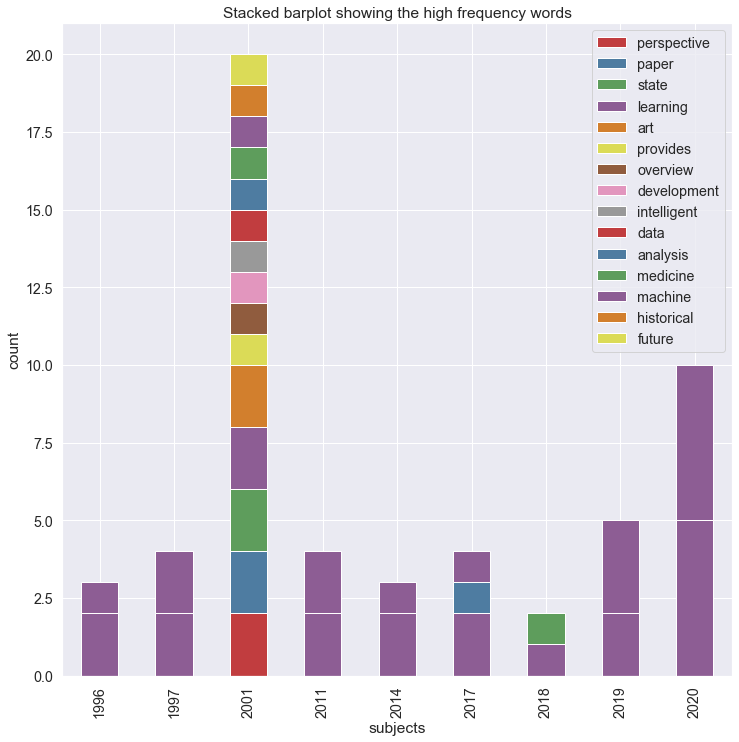

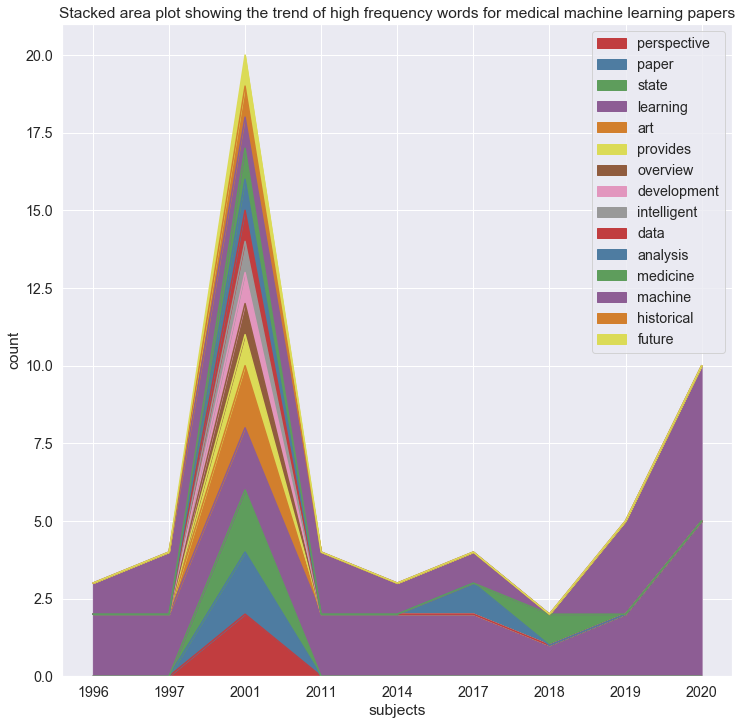

In [244]:
sns.set(rc={'figure.figsize':(12,12)}, font_scale=1.3)
sns.set_palette("Set1", 20, .65)


ax = word_count_per_sub_df.plot.bar(stacked=True);
ax.set(xlabel='subjects', ylabel='count', title = 'Stacked barplot showing the high frequency words')
plt.show()


ax = word_count_per_sub_df.plot.area(stacked=True);
ax.set(xlabel='subjects', ylabel='count', title = 'Stacked area plot showing the trend of high frequency words for medical machine learning papers')
plt.show()